In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/mnt/disk15tb/paula/Main_DA_Projects/data_analysis_output/Primary Neurons/CDKL5_T2_jan21/Network_outputs/Compiled_Networks_latest.csv")

In [10]:
df.head()

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,mean_IBI,cov_IBI,mean_Burst_Peak,cov_Burst_Peak,...,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor,BurstRate,IBI_List,Burst_Peak_List,Abs_Burst_Peak_List,Burst_Times_List,SpikesPerBurst_List
0,10,7,1,MxWT,28-May-2024 18:54:05,M07305,21.291667,72.802004,7.370736,101.306529,...,156.805226,0.319863,74.397948,289.052913,0.043333,"4.6,24.2,28,6.2,6.4,16.4,19.8,18.7,41,11.7,58,...","1.7513,16.1839,1.9604,2.1054,1.9462,17.3417,10...","1156.8927,1087.4723,1107.9535,1349.9798,797.05...","3.4,0.4,1.1,0.8,1,0.5,0.4,0.9,7,1.4,0.8,0.5,1","3392,6674,1629,1313,1443,8169,3949,1160,7166,1..."
1,10,7,2,MxWT,28-May-2024 18:54:05,M07305,44.620000,52.570412,14.375166,45.718366,...,126.322600,0.312502,78.455576,372.670651,0.020000,"58.7,52.7,44.8,62.5,4.4","16.1941,17.911,13.3986,1.8548,20.6016,16.2909","748.4162,890.7915,997.4979,1175.665,756.0119,8...","0.6,0.8,0.4,1,0.8,0.5","9480,13445,5442,1398,16071,7375"
2,10,7,3,MxWT,28-May-2024 18:54:05,M07305,51.280000,41.716494,10.803068,65.395841,...,120.606258,0.306492,72.882740,189.237245,0.020000,"35.4,63.9,56.6,76.6,23.9","1.9595,16.6874,15.1263,16.3053,13.0349,1.705","1170.3668,1186.4946,1243.568,1249.6178,1124.07...","0,1,0.6,0.9,0.4,0","0,15364,8340,13760,5470,0"
3,10,7,4,FxHET,28-May-2024 18:54:05,M07305,15.194737,77.540473,7.144018,87.431678,...,149.528549,0.313414,78.781414,391.373863,0.066667,"14.2,31.2,8,10.7,2.3,10,14.5,11,33,4.9,5.8,5.9...","1.6096,1.7033,14.8868,10.5737,1.7517,11.5835,1...","925.9315,686.206,673.6575,812.8156,1648.2149,1...","0.2,1.2,0.6,0.4,1.3,0.4,0.4,0.8,0.2,2.3,0.4,0....","353,1476,8277,4122,1474,4900,4759,1198,477,281..."
4,10,7,5,FxHET,28-May-2024 18:54:05,M07305,13.816667,51.610245,6.753818,105.660353,...,144.432414,0.310711,80.425649,455.569837,0.063333,"6.4,6.2,10.4,13.6,19.5,16,26.3,11,4.2,16.7,10....","13.3851,1.65,1.8404,1.6429,20.3011,1.672,10.51...","1326.2974,730.2939,800.5969,511.6467,1358.1759...","0.4,0.2,1.1,0.2,0.9,1.3,0.4,0.6,0.4,0.5,0.6,0....","5483,471,1392,453,17488,1367,4281,9569,4718,98..."


In [12]:
df["Burst_Peak_List"] = df["Burst_Peak_List"].apply(lambda x : [ float(i) for i in x.split(",")])

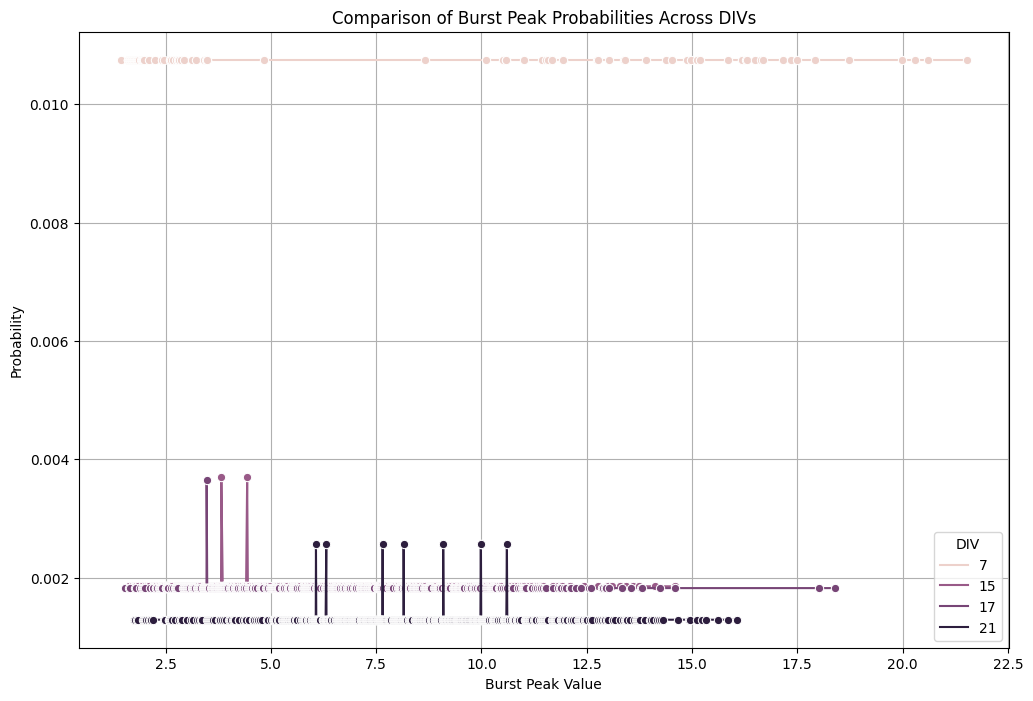

In [17]:
from collections import Counter
# Combine burst peak lists for each DIV
def aggregate_burst_peaks(df):
    aggregated = df.groupby("DIV")["Burst_Peak_List"].apply(lambda x: [item for sublist in x for item in sublist])
    return aggregated

aggregated_burst_peaks = aggregate_burst_peaks(df)

# Calculate probabilities for each DIV
def calculate_probabilities(data):
    counts = Counter(data)
    total = sum(counts.values())
    probabilities = {value: count / total for value, count in counts.items()}
    return probabilities

# Calculate and store probabilities for each DIV
probabilities_per_div = aggregated_burst_peaks.apply(calculate_probabilities)

# Convert probabilities into a structured format for plotting
divs = []
values = []
probs = []

for div, prob_dict in probabilities_per_div.items():
    for value, prob in prob_dict.items():
        divs.append(div)
        values.append(value)
        probs.append(prob)

comparison_df = pd.DataFrame({"DIV": divs, "Value": values, "Probability": probs})

# Plot probabilities across DIVs
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(data=comparison_df, x="Value", y="Probability", hue="DIV", marker="o")
plt.title("Comparison of Burst Peak Probabilities Across DIVs")
plt.xlabel("Burst Peak Value")
plt.ylabel("Probability")
plt.legend(title="DIV")
plt.grid()
plt.show()